In [1]:
import pandas as pd

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

import numpy as np
from tqdm import trange

import matplotlib.pyplot as plt
import seaborn as sns


device = torch.device("cuda", 0)
%matplotlib inline

my_cmap = plt.cm.jet
my_cmap.set_under('white')

In [2]:
df = pd.read_csv("/home/shirobokov/data/diff_gen_data/physics_data/xz_magnet_opt.csv", index_col=0)

In [3]:
df.head()

,start_px,start_py,start_pz,pid,hit_x,hit_y,hit_z,magn_len,magn_x,start_theta,start_phi,start_P
0,0.585307,-0.239336,7.729657,-13.0,-103.602234,-4.812062,-13000.0,5.0,7.0,0.081627,-0.388161,7.755479
1,0.860176,-1.341563,3.837597,-13.0,-10000.000000,-10000.000000,-10000.0,5.0,7.0,0.393601,-1.000650,4.155339
2,-1.175180,1.289560,8.766644,-13.0,-752.243652,345.333649,-13000.0,5.0,7.0,0.196450,2.309821,8.938572
3,-1.681919,0.904257,9.074683,-13.0,-626.921997,206.969193,-13000.0,5.0,7.0,0.207404,2.648293,9.273425
4,0.773998,3.037582,7.728539,-13.0,110.676453,959.350342,-13000.0,5.0,7.0,0.385319,1.321298,8.340042


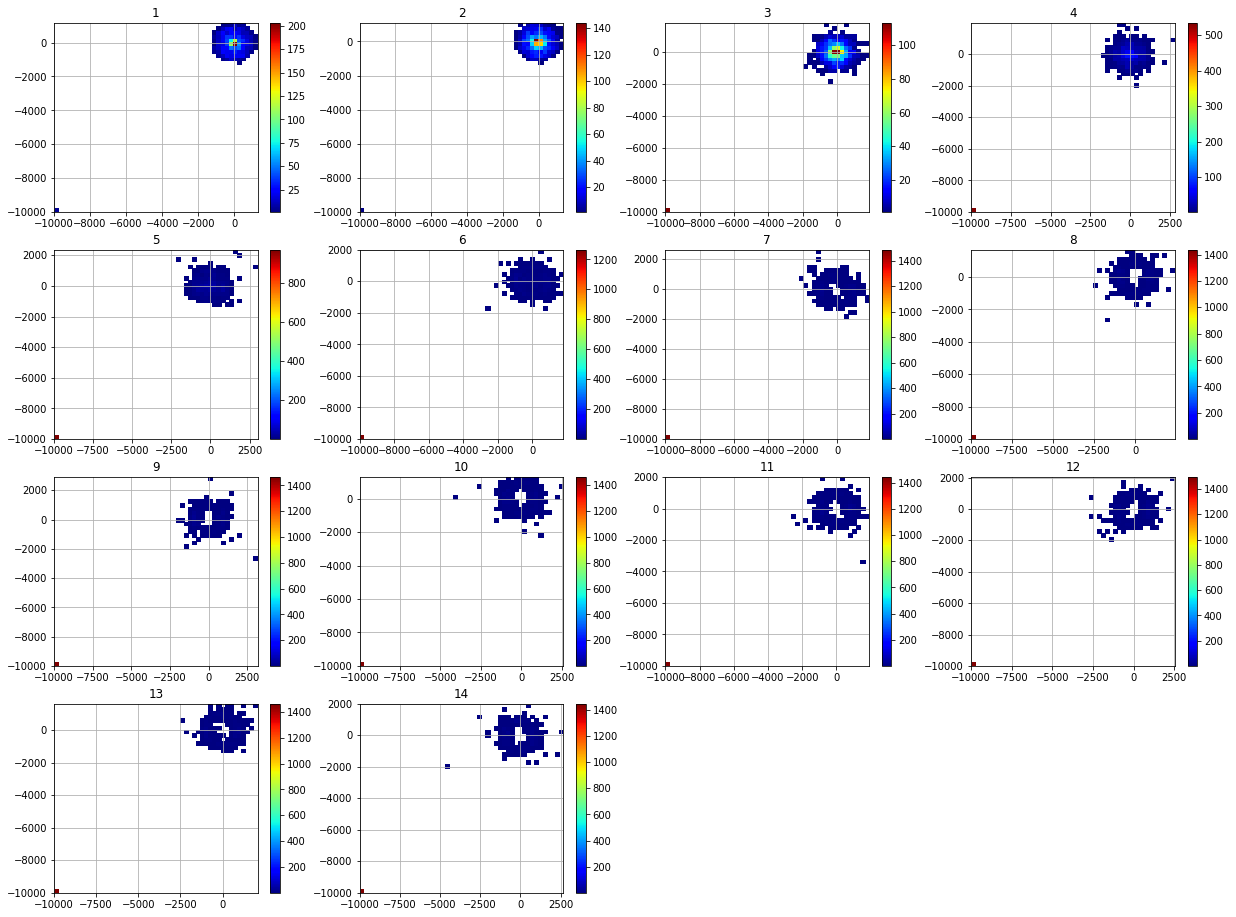

In [5]:
plt.figure(figsize=(21,16))
for i in range(1,15):
    plt.subplot(4,4, i)
    cuts = df[np.logical_and(df.magn_len == i, df.magn_x == 4)]
    plt.hist2d(cuts.hit_x, cuts.hit_y, bins=50,cmap=my_cmap, cmin=1e-10)
    plt.colorbar()
    plt.grid()
    plt.title(f"{i}")

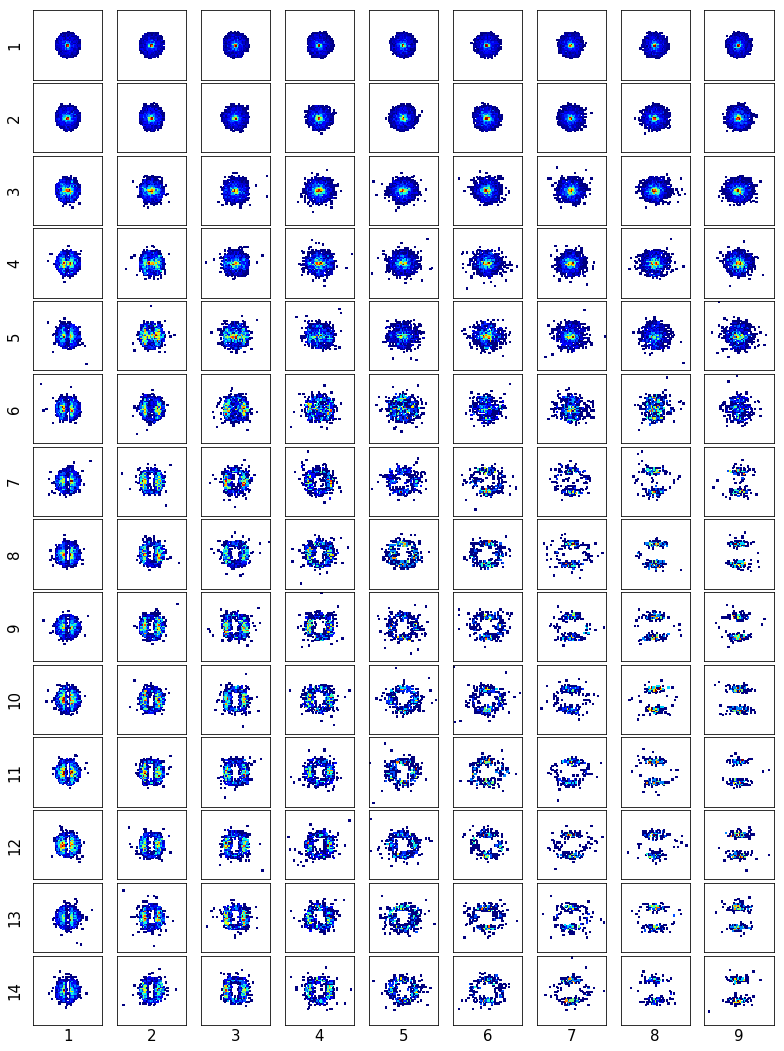

In [24]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(15,20))
gs1 = gridspec.GridSpec(15, 10)
gs1.update(wspace=0.025, hspace=0.05)

for i in range(1,15):
    for j in range(1,10):
        ax = plt.subplot(gs1[i,j])
        mask = np.logical_and(df.magn_len == i, df.magn_x == j)
        plt.hist2d(df[mask].hit_x, df[mask].hit_y,
                   bins=50, cmap=my_cmap, cmin=1e-10, range=((-3000, 3000), (-3000, 3000)))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_aspect('equal')
        if j == 1:
            ax.set_ylabel(i, fontsize=15)
        if i == 14:
            ax.set_xlabel(j, fontsize=15)
        plt.tick_params(
            axis='both',       
            which='both',      
            bottom=False,      
            left=False,
            labelbottom=False)        